In [33]:
conda install -c conda-forge fbprophet

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.07  |           py38_0           6 KB
    anaconda-custom            |           py38_1          36 KB
    arviz-0.10.0               |             py_0         1.3 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         184 KB  conda-forge
    certifi-2020.6.20          |   py38h9bdc248_2         152 KB  conda-forge
    cftime-1.2.1               |   py38h1e00858_1         220 KB  conda-forge
    conda-4.9.0                |   py38h9bdc248_1         3.1 MB  conda-forge
    convertdate-2.2.2          |     pyh9f0ad1d_0          33 KB  conda-forge
    ephem-3.7.7.1              |   py38h1e8a9f7_1         751 KB  conda-forge
    fbprophet-0.7.1        


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2020.07=py38_0
  - defaults/win-64::patsy==0.5.1=py38_0
  - defaults/win-64::scikit-image==0.16.2=py38h47e9c7a_0
  - defaults/win-64::scikit-learn==0.23.1=py38h25d0782_0
  - defaults/noarch::seaborn==0.10.1=py_0
  - defaults/win-64::statsmodels==0.11.1=py38he774522_0


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.9.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [21]:
!pip install sys

ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys


In [51]:
import sys
import os
import pandas as pd
import numpy as np
from fbprophet import Prophet
df=pd.read_csv('C:\\Users\\user\\Desktop\\data\\07. example_wp_peyton_manning.csv ')

df['y']=np.log(df['y'])

df.head(30)


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
5,2007-12-15,7.783641
6,2007-12-16,8.414052
7,2007-12-17,8.829226
8,2007-12-18,8.382518
9,2007-12-19,8.069655


In [39]:
"""
예측과정의 모든 세팅이 제작기에 넘겨졌다.
그러면 fit메소드를 부르고 historical dataframe에 넘긴다.
"""

m = Prophet()
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


In [45]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.202479,7.458606,8.930450
3266,2017-01-16,8.527473,7.825382,9.274334
3267,2017-01-17,8.314861,7.547649,9.027032
3268,2017-01-18,8.147459,7.381141,8.837217
3269,2017-01-19,8.159363,7.405200,8.904627


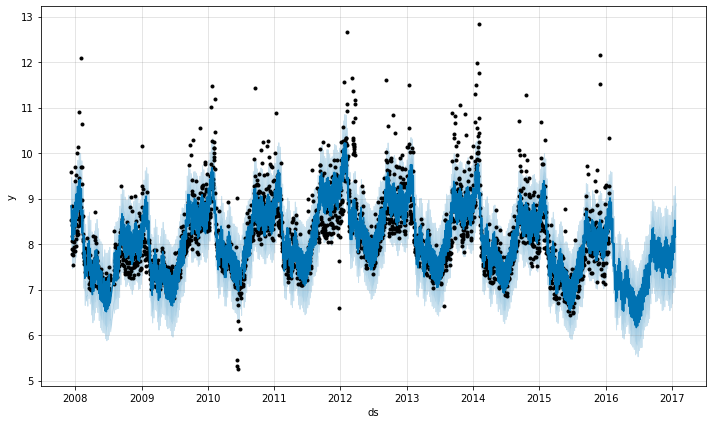

In [46]:
#Prophet.plot 메소드를 불러와서 예측 데이터프레임에 넘겨준다
m.plot(forecast);


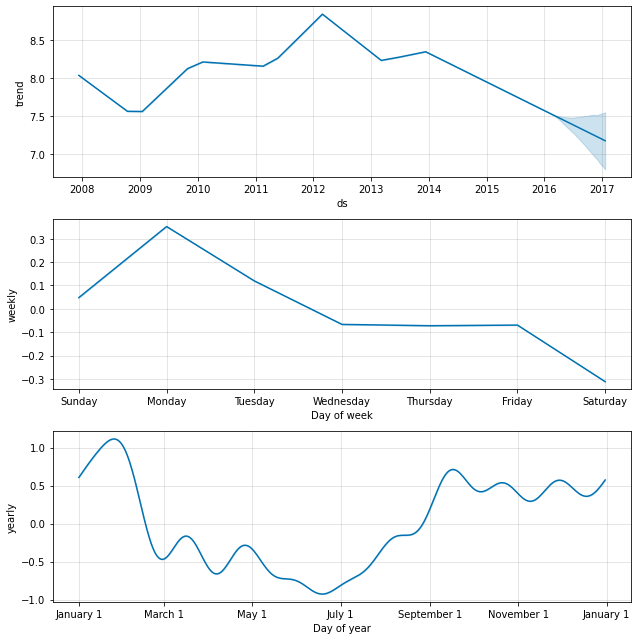

In [49]:
"""
만약 예측 부분을 보고싶다면,
Prophet.plot_component 메소드를 사용하면 된다.
기본값으로 연간 계절성과 주간 계절성 시계열 트렌드를 보게될것이다.
공휴일을 포함하면 그것들도 볼 수 있다.
"""
m.plot_components(forecast);